In [25]:
import main
import numpy as np
import matplotlib.pyplot as plt

../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened
1
2
executed


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


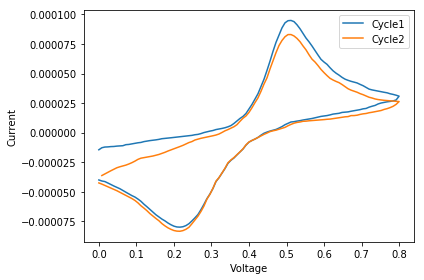

In [28]:
dict_1,n_cycle = main.read_file('../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
main.plot(dict_1, n_cycle)


In [31]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
main.peak_currents(df,[838],'Current')

array([-0.0001184])

In [44]:
import peakutils 
def peak_detection(data_y):
    """ peak_detection(dataframe['y column'])
    This function returns a list of the indecies of the y values of the peaks detected in the dataset.
    The function takes an input of the column containing the y variables in the dataframe.
    This column is then split into two arrays, one of the positive and one of the negative values.
    This is because cyclic voltammetry delivers negative peaks however the peakutils function work better with positive peaks.
    The absolute values of each of these vectors are then imported into the peakutils.indexes 
    function to determine the significant peak(s) for each array. The value(s) are then saved as a list."""
    
    index_list = []
    
    y1, y2 = main.split(data_y)
    
    peak_top = peakutils.indexes(y2, thres=0.1, min_dist=0.001)
    peak_bottom = peakutils.indexes(abs(y1), thres=0.1, min_dist=0.001)
    index_list.append([peak_top[0], peak_bottom[0]])
    
    return index_list

In [45]:
peak_detection(y)

[[371, 650]]

In [3]:
for i in range(n_cycle-1):
    i = i+1
    df = main.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
  
    peak_index = main.peak_detection(y)
    
    x1,x2 = main.split(x)
    y1,y2 = main.split(y)
    y_base1 = main.linear_background(x1,y1)
    y_base2 = main.linear_background(x2,y2)
    
   

IndexError: index 0 is out of bounds for axis 0 with size 0

[[781, 2]]
-0.000118403
2.93533e-06
4.33452e-05
-4.73415e-05


/Users/sabiha/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


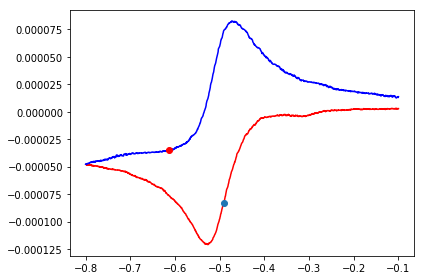

In [46]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
peak_index = main.peak_detection(y)
print(peak_index)
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x1[781],y1[781],marker='o')
plt.plot(x2[371],y2[371],marker='o',color = 'red')
print(y1[838])
print(y1[8])
print(y2[838])
print(y2[8])

In [26]:
def critical_idx(x, y): ## Finds index where data set is no longer linear 
    """
    This function takes x and y values callculate the derrivative of x and y, and calculate moving average of 5 and 15 points.
    Finds intercepts of different moving average curves and return the indexs of the first intercepts.
    """
    k = np.diff(y)/(np.diff(x)) #calculated slops of x and y

    ## Calculate moving average for 5 and 15 points.
    ## This two arbitrary number can be tuned to get better fitting.
    ave5 = []
    ave15 = []
    for i in range(len(x)-5):  # The reason to minus 5 is to prevent j from running out of index.
        a = 0 
        for j in range(0,5):
            a = a + k[i+j]
        ave5.append(round(a/5, 9)) # keeping 9 desimal points for more accuracy
    ave5 = np.asarray(ave5)
    for i in range(len(x)-15): 
        b = 0 
        for j in range(0,15):
            b = b + k[i+j]
        ave15.append(round(b/15, 9))
    ave15 = np.asarray(ave15)
    ## Find intercepts of different moving average curves
    idx = np.argwhere(np.diff(np.sign(ave15 - ave5[:len(ave15)])!= 0)).reshape(-1) #reshape into one row.
    return int(idx[0])

In [27]:
critical_idx(x2,y2)

IndexError: index 0 is out of bounds for axis 0 with size 0